In [351]:
import numpy as np

In [352]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [353]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

<h2>Preprocessing</h2>

In [354]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
display(X_train.shape)
display(X_test.shape)
display(X_train[0])

(60000, 784)

(10000, 784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [355]:
a = np.array([[1,2,3], [3,4,5], [4,5,6]])
display(a.shape)
display(a.reshape(-1))

(3, 3)

array([1, 2, 3, 3, 4, 5, 4, 5, 6])

In [356]:
import matplotlib.pyplot as plt

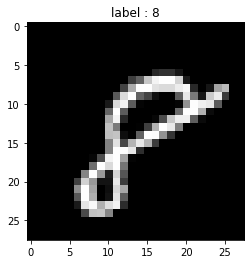

In [357]:
%matplotlib inline
index = 59999
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [358]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [359]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

print(y_train_one_hot[0:5])

(60000,)
(60000, 10)
float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [360]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000, 10)


<h2>Scratch Neural Network</h2>

In [361]:
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]   

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [362]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, activation1='sigmoid', activation2='sigmoid', batch_size=None, n_epochs=1, lr=0.01, seed=0, verbose=False):
        self.verbose = verbose
        self.seed = seed
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.activation1 = activation1
        self.activation2 = activation2
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.lr = lr

    def _init_weight_and_bias(self):
        W = np.full(3, None)
        B = np.full(3, None)
        sigma = 0.01
        W[0] = sigma * np.random.randn(self.n_features, self.n_nodes1)
        W[1] = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        W[2] = sigma * np.random.randn(self.n_nodes2, self.n_output)

        B[0] = sigma * np.random.randn(self.n_nodes1)
        B[1] = sigma * np.random.randn(self.n_nodes2)
        B[2] = sigma * np.random.randn(self.n_output)
        return W, B

    def _sigmoid(self, A):
        return 1 / (1 + np.exp(-A))
    
    def _hyperbolic_tangent(self, A):
        return np.tanh(A)
    
    def _softmax(self, A):
        return (np.exp(A).T / np.sum(np.exp(A), axis=1)).T
        
    def _activation_chooser(self, A, activation):
        if (activation == 'sigmoid'):
            return self._sigmoid(A)
        elif (activation == 'tanh'):
            return self._hyperbolic_tangent(A)
        elif (activation == 'softmax'):
            return self._softmax(A)
        return Exception("Please choose 1 of a following 'sigmoid', 'tanh', 'softmax'")

    def _foward_propagation(self, X, W, B):
        A = np.full(W.shape[0], None)
        Z = np.full(W.shape[0], None)
        #first layer
        A[0] = X @ W[0] + B[0]
        Z[0] = self._activation_chooser(A[0], self.activation1)
        #second layer
        A[1] = Z[0] @ W[1] + B[1]
        Z[1] = self._activation_chooser(A[1], self.activation2)
        #final layer
        A[2] = Z[1] @ W[2] + B[2]
        Z[2] = self._activation_chooser(A[2], 'softmax')
        return A, Z

    def _compute_CEE(self, y, Z_3):
        """compute cross entropy error"""
        return -(1 / self.batch_size) * np.sum((y @ np.log(Z_3 + 1e-7).T))

    def _backward_propagation(self, X, y, A, Z, W):
        dL_dA = np.full(A.shape[0], None)
        dL_dB = np.full(A.shape[0], None)
        dL_dW = np.full(A.shape[0], None)
        dL_dZ = np.full(A.shape[0] - 1, None)
        #third layer
        dL_dA[2] = (Z[2] - y) / self.batch_size
        dL_dB[2] = np.sum(dL_dA[2], axis=0)
        dL_dW[2] = Z[1].T @ dL_dA[2]
        dL_dZ[1] = dL_dA[2] @ W[2].T
        #second layer
        dL_dA[1] = dL_dZ[1] * (1 - self._activation_chooser(A[1], self.activation2)**2)
        dL_dB[1] = np.sum(dL_dA[1], axis=0)
        dL_dW[1] = Z[0].T @ dL_dA[1]
        dL_dZ[0] = dL_dA[1] @ W[1].T
        #first layer
        dL_dA[0] = dL_dZ[0] * (1 - self._activation_chooser(A[0], self.activation1)**2)
        dL_dB[0] = np.sum(dL_dA[0], axis=0)
        dL_dW[0] = X.T @ dL_dA[0]
        return dL_dW, dL_dB

    def _gradient_descent(self, X, y):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=self.seed)
        W, B = self._init_weight_and_bias()
        CEE_list = []
        for _ in range(0, self.n_epochs):
            for mini_X, mini_y in get_mini_batch:
                A, Z = self._foward_propagation(mini_X, W, B)
                CEE_list.append(self._compute_CEE(mini_y, Z[-1]))
                dL_dW, dL_dB = self._backward_propagation(mini_X, mini_y, A, Z, W)
                W -= self.lr * dL_dW
                B -= self.lr * dL_dB
        return W, B, np.array(CEE_list)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.n_output = y.shape[1]
        self.n_features = X.shape[1]
        self.W, self.B, self.CEE_list = self._gradient_descent(X, y)
        if (X_val != None and y_val != None):
            self.W_val, self.B_val, self.CEE_list_val = self._gradient_descent(X_val, y_val)

    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        _, Z = self._foward_propagation(X, self.W, self.B)
        return np.argmax(Z[-1], axis=1)

In [363]:
nn3 = ScratchSimpleNeuralNetrowkClassifier(
       n_nodes1=400,
       n_nodes2=200,
       activation1='tanh',
       activation2='tanh',
       batch_size=4800,
       n_epochs=100,
       lr=0.0001,
       verbose=False,
       seed=69
)

nn3.fit(X_train, y_train)

In [364]:
y_pred = nn3.predict(X_val)

In [365]:
y_pred[:50]

array([4, 6, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 9,
       4, 4, 6, 6, 4, 4])

In [366]:
np.argmax(y_val, axis=1)

array([1, 9, 5, ..., 3, 3, 1])

Text(0.5, 1.0, 'CEE graph')

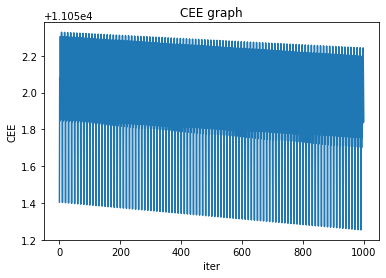

In [367]:
plt.plot(np.arange(0, nn3.CEE_list.shape[0]), nn3.CEE_list)
plt.xlabel("iter")
plt.ylabel("CEE")
plt.title("CEE graph")